TW performance tracker etc

In [1]:
# Import modules
import os
import csv
import itertools
from operator import itemgetter
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
from datetime import datetime

In [2]:
# Define some stuff

class StopExecution(Exception):
    def _render_traceback_(self):
        pass

    
# Get List of Players
def get_players(file_name, data_list):
    with open(file_name, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        
        # Get the total number of rows
        rows = list(reader)
        total_rows = len(rows)
        # Go back to the start of csv file and fill the arrays
        csvfile.seek(0)
        for row in itertools.islice(reader, 1, int(total_rows/4) + 1):
            data_list.append(row['Player'])
            #print(row['Player'])
    
# Read info from csv file
def read_csv(file_name, list_of_players, data_list):
    with open(file_name, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        
        for player in list_of_players:
            csvfile.seek(0)
            for row in reader:
                if row['Stat'] == "stars" and row['Player'] == player:
                    data_list[0].append(row['Player'])
                    data_list[1].append(int(row['Score']))
                if row['Stat'] == "set_defense_stars" and row['Player'] == player:
                    data_list[2].append(int(row['Score']))
                if row['Stat'] == "attack_stars" and row['Player'] == player:
                    data_list[3].append(int(row['Score']))
                if row['Stat'] == "disobey" and row['Player'] == player:
                    data_list[4].append(int(row['Score']))
                    
            
            
       



In [3]:
# Look for the csv files
# and do some processing so we can organise them by date 

path = "." # Path to the csv files
os.chdir(path)
files = []
dates = []
file_date_pair = []        
    
# Iterate through all files
for file in os.listdir():
    # Check whether file is in csv format or not
    if file.endswith(".csv"):
        #file_path = f"{path}/{file}"
        files.append(file)
        
        x, month, day, year, y = file.split("_",4)
        my_date = day+"-"+month+"-"+year
        dates.append(my_date)
        
# Making pairs
for i in range(len(files)):
    pair = (files[i], dates[i])
    file_date_pair.append(pair)

file_date_pair.sort(key=lambda date: datetime.strptime(date[1], "%d-%b-%Y"))
file_date_pair.reverse()
print("Found the following csv files: \n")
print(*file_date_pair, sep = "\n")

# Manually remove some of the csv files (some have bad data due player leaving for a merc)
files_to_remove = ["26-Apr-2021"]

if files_to_remove:
    print("\nRemoving the following files..")
    print(*files_to_remove, sep="\n")
    for i in files_to_remove:
        file_exists = i in (item for sublist in file_date_pair for item in sublist)
        if file_exists:
            for j in file_date_pair:
                if i in j[1]:
                    file_date_pair.remove((j[0], j[1]))
            
        else:
            print("The file \"" + i +"\" doesn't exist - ignoring it and continuing..")
            
    print("\n")
    print(*file_date_pair, sep = "\n")


Found the following csv files: 

('Fri_May_21_2021_105842_GMT-0700_Pacific_Daylight_Time.csv', '21-May-2021')
('Mon_May_10_2021_094526_GMT-0700_Pacific_Daylight_Time.csv', '10-May-2021')
('Thu_May_06_2021_102741_GMT-0700_Pacific_Daylight_Time.csv', '06-May-2021')
('Mon_Apr_26_2021_042158_GMT-0700_Pacific_Daylight_Time.csv', '26-Apr-2021')
('Wed_Apr_21_2021_103623_GMT-0700_Pacific_Daylight_Time.csv', '21-Apr-2021')

Removing the following files..
26-Apr-2021


('Fri_May_21_2021_105842_GMT-0700_Pacific_Daylight_Time.csv', '21-May-2021')
('Mon_May_10_2021_094526_GMT-0700_Pacific_Daylight_Time.csv', '10-May-2021')
('Thu_May_06_2021_102741_GMT-0700_Pacific_Daylight_Time.csv', '06-May-2021')
('Wed_Apr_21_2021_103623_GMT-0700_Pacific_Daylight_Time.csv', '21-Apr-2021')


In [4]:
# Read in the most recent list of players and data
curr_players = []
curr_data    = [[] for i in range(6)]
guild_tot    = [0] * len(file_date_pair)
guild_def    = [0] * len(file_date_pair)
guild_att    = [0] * len(file_date_pair)
guild_RA     = [0] * len(file_date_pair)

print(file_date_pair[0][0])
# access the files [0][0] gets the first pair in the list and the first element of the pair (i.e. the most recent csv file).
get_players(file_date_pair[0][0], curr_players)
read_csv(file_date_pair[0][0], curr_players, curr_data)

sum_tot = 0
sum_def = 0
sum_att = 0
sum_RA  = 0
for i in range(len(curr_data[0])):
    # Get the average score for the guild
    sum_tot += curr_data[1][i]
    sum_def += curr_data[2][i]
    sum_att += curr_data[3][i]
    sum_RA += curr_data[4][i]
    
    # Get some sort of efficiency for each player
    if curr_data[4][i] != 0:
        #print(data[3][i])
        curr_data[5].append(curr_data[3][i]/curr_data[4][i])
        
    else:
        curr_data[5].append(0)

guild_tot[0] = (sum_tot/len(curr_data[0]))
guild_def[0] = (sum_def/len(curr_data[0]))
guild_att[0] = (sum_att/len(curr_data[0]))
guild_RA[0]  = (sum_RA/len(curr_data[0]))

print(guild_def)

curr_data=np.array(curr_data, dtype=object).T
#print(*curr_data, sep = "\n")



Fri_May_21_2021_105842_GMT-0700_Pacific_Daylight_Time.csv
[147.84, 0, 0, 0]


Smilol 244 12.857142857142858
Dark Sebo Wan 192 14.4
Oicis 315 8.733333333333333
Sem 193 13.0
Plagais 209 13.75
BurglarBeagle 254 14.0
Beyla 219 9.285714285714286
Denozvr 178 9.0
Themi 239 11.5
l2ed Leader 298 11.076923076923077
xcorpio 252 9.714285714285714
Nerf Herder 273 11.9
eekajj 239 12.142857142857142
SlizzyFizz 214 12.0
ŒArsmant 250 13.714285714285714
Sexbobomb 295 11.75
Coimba 201 9.4
Heisenberg 143 4.75
Seandwe 242 11.6


<BarContainer object of 19 artists>

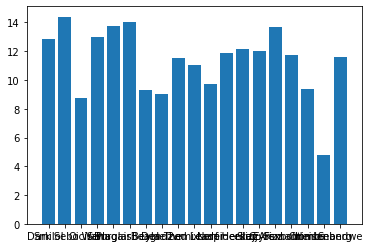

In [5]:
# Plot some stuff
Player = []
Efficiency = []
# Get players with low efficiency 

for i in range(len(curr_data)):
    #print(i)
    if float(curr_data[i][5]) < 15 and float(curr_data[i][5] != 0):
        print(curr_data[i][0], curr_data[i][1], curr_data[i][5])
        Player.append(curr_data[i][0])
        Efficiency.append(curr_data[i][5])
# Offence Banners
#plt.rcParams["figure.figsize"] = (50,50)

plt.bar(Player, Efficiency)


In [10]:
# Get data from the previous TW's
data = [[] for i in range(5)]
for i in range(1, len(file_date_pair)):
    
    read_csv(file_date_pair[i][0], curr_players, data)
    
    sum_tot = 0
    sum_def = 0
    sum_att = 0
    sum_RA  = 0
    for j in range(len(data[0])):
    # Get the average score for the guild
        sum_tot += data[1][j]
        sum_def += data[2][j]
        sum_att += data[3][j]
        sum_RA  += data[4][j]
    
    guild_tot[i] = (sum_tot/len(data[0]))
    guild_def[i] = (sum_def/len(data[0]))
    guild_att[i] = (sum_att/len(data[0]))
    guild_RA[i]  = (sum_RA/len(data[0]))


data=np.array(data, dtype = object).T
#print(*data, sep = "\n")

In [7]:
n_entries = len(data)
#print(n_entries)
average_data  = [[] for i in range(6)]
tot_banners   = 0
tot_def       = 0
tot_att       = 0
tot_RA        = 0

print("Average Banners from the last", len(file_date_pair), "TW's" )
print("")
print("Player        |  Total Banners  |  Defence |  Attack  |  Rogue Actions  |  Efficiency")


for curr_player in curr_data:
    tot_banners = curr_player[1]
    tot_def     = curr_player[2]
    tot_att     = curr_player[3]
    tot_RA      = curr_player[4]
    n_TW = 1
    for player in data:
        if curr_player[0] == player[0]:
            n_TW += 1
            #print(n_TW)
            tot_banners += player[1]
            tot_def     += player[2]
            tot_att     += player[3]
            tot_RA      += player[4]
            #print(curr_player[0])
 
    if tot_RA != 0:
        efficiency = tot_att/(20 * tot_RA)
    else:
        efficiency = 0
       
    average_data[0].append(curr_player[0])
    average_data[1].append(tot_banners/n_TW)
    average_data[2].append(tot_def/n_TW)
    average_data[3].append(tot_att/n_TW)
    average_data[4].append(tot_RA/n_TW)
    average_data[5].append(efficiency)

    
#average_data=np.array(average_data, dtype=object).T.tolist()



#print(*average_data, sep = "\n")

average_data=zip(*average_data)
average_data=sorted(average_data, key=itemgetter(5), reverse=True)
for player, tot_banners, def_banners, att_banners, RA, eff in average_data:
    
    print(player.ljust(20), '%6.2f %12.2f %12.2f %12.2f %12.2f' %(tot_banners, def_banners, att_banners, RA, eff))


Average Banners from the last 4 TW's

Player        |  Total Banners  |  Defence |  Attack  |  Rogue Actions  |  Efficiency
Shadowcat USM        252.25       154.00        98.25         5.25         0.94
Pдсо                 264.00       161.50       102.50         5.50         0.93
Corey Gandy          166.75       115.50        51.25         2.75         0.93
Brill Adrien         221.50       139.00        82.50         4.50         0.92
Vovka                226.00       154.00        72.00         4.00         0.90
SithHunter           287.00       184.00       103.00         5.75         0.90
Ace                  295.00       154.00       141.00         8.00         0.88
White dead           240.75       161.50        79.25         4.50         0.88
Bro Beans            241.50       154.00        87.50         5.00         0.88
Gladiator Motoko     314.00       218.00        96.00         5.50         0.87
DANTE                263.00       154.00       109.00         6.25         0

Getting info for Themi
[5.75, 7.8, 6.55, 7.05]


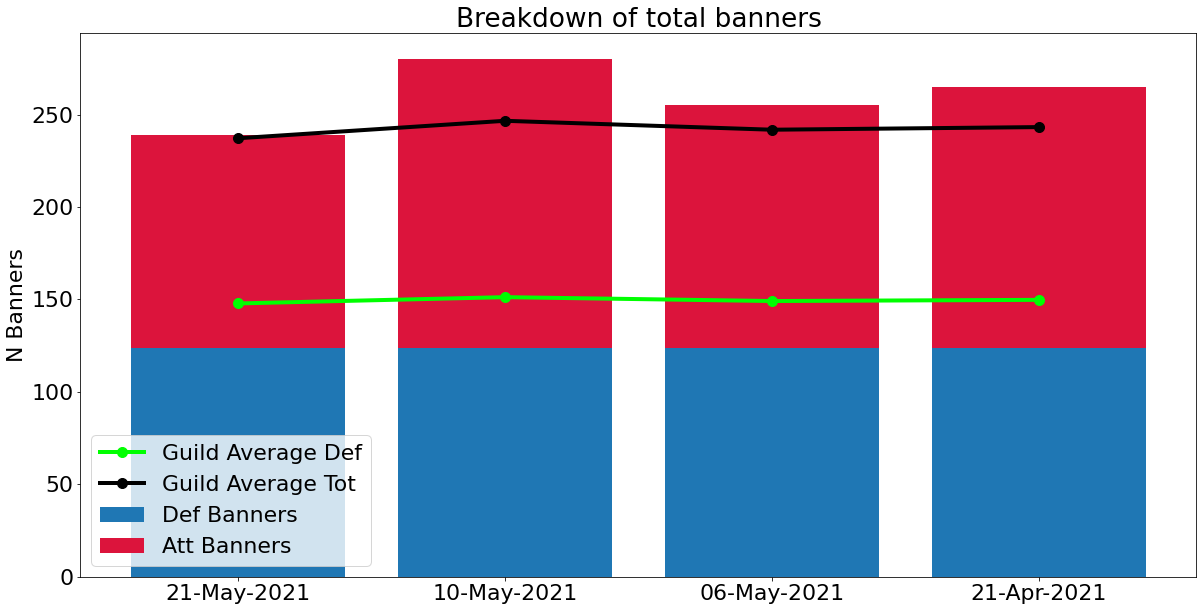

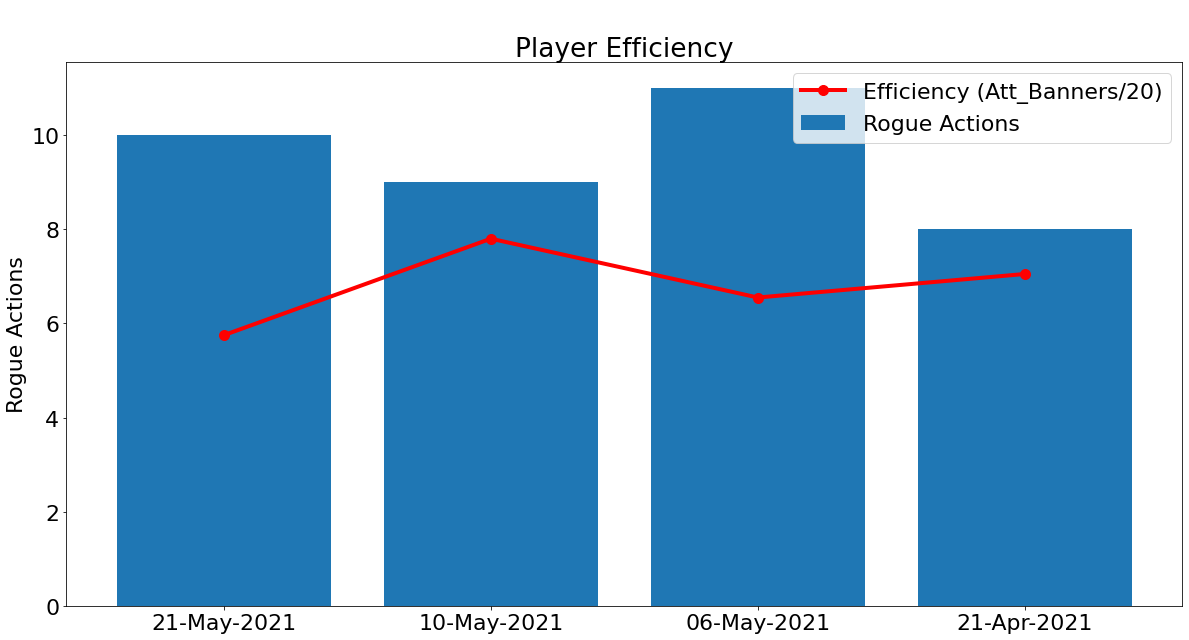

In [45]:
# Graph X players performance
the_chosen_one="Themi"

# Boolean to check if player name exists
# Think this checks every element in the list of lists - is fast so don't care it's inefficient 
found_player = the_chosen_one in (item for sublist in curr_data for item in sublist)
chosen_one_tot        = [0] * len(file_date_pair)
chosen_one_def        = [0] * len(file_date_pair)
chosen_one_att        = [0] * len(file_date_pair)
chosen_one_RA         = [0] * len(file_date_pair)
chosen_one_efficiency = [0] * len(file_date_pair)
if not found_player:
    print("Couldn't find player:", the_chosen_one)
    print("Maybe check spelling (copy from the above list)")
    
    raise StopExecution
    
else:
    print("Getting info for", the_chosen_one)
    
    for player in curr_data:
        if the_chosen_one == player[0]:
            chosen_one_tot[0] = (player[1])
            chosen_one_def[0] = (player[2])
            chosen_one_att[0] = (player[3])
            chosen_one_RA[0]  = (player[4])
            
            if player[4] != 0:
                chosen_one_efficiency[0] = player[3]/(20)
            else:
                chosen_one_efficiency[0] = 0
    i = 0
    for player in data:
        if the_chosen_one == player[0]:
            i += 1
            chosen_one_tot[i] = (player[1])
            chosen_one_def[i] = (player[2])
            chosen_one_att[i] = (player[3])
            chosen_one_RA[i]  = (player[4])
            
            if player[4] != 0:
                chosen_one_efficiency[i] = player[3]/(20)
            else:
                chosen_one_efficiency[i] = 0


# Get x-axis - the TW dates
x_axis = []
for date in file_date_pair:
    x_axis.append(date[1])
    
if len(chosen_one_def) != len(file_date_pair):
    missing_TW = len(file_date_pair) - len(chosen_one_def)
        
    print(missing_TW)
        
print(chosen_one_efficiency)
    
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 22})
plt.title("Breakdown of total banners")
plt.ylabel("N Banners")
# Plot attack and defence banners
plt.bar(x_axis, chosen_one_def, label = "Def Banners") 
plt.plot(x_axis, guild_def, color = 'lime', linewidth=4, marker = 'o', markersize =10, label = "Guild Average Def")
plt.plot(x_axis, guild_tot, color = 'black', linewidth=4, marker = 'o', markersize =10, label = "Guild Average Tot")
plt.bar(x_axis, chosen_one_att, bottom = chosen_one_def, color = 'crimson', label = "Att Banners")
plt.legend()

# Plot efficiency 
# Doesn't account for ships giving 22 banners or for non-first-time battles
# Obviously doesn't account for false RA
# Perfect efficiency would show the red line at the peak (just above) the RA bars
plt.figure()
plt.title("\nPlayer Efficiency")
plt.ylabel("Rogue Actions")
plt.bar(x_axis, chosen_one_RA, label = "Rogue Actions")
plt.plot(x_axis, chosen_one_efficiency, 'red', linewidth=4, marker = 'o', markersize =10, label = "Efficiency (Att_Banners/20)")
plt.legend()